In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
print("All modules imported!")

All modules imported!


In [ ]:
state = pd.read_csv('drive/MyDrive/Zillow/State_time_series.csv')

print(state)

             Date    RegionName  DaysOnZillow_AllHomes  \
0      1996-04-30       Alabama                    NaN   
1      1996-04-30       Arizona                    NaN   
2      1996-04-30      Arkansas                    NaN   
3      1996-04-30    California                    NaN   
4      1996-04-30      Colorado                    NaN   
...           ...           ...                    ...   
13207  2017-12-31      Virginia                    NaN   
13208  2017-12-31    Washington                    NaN   
13209  2017-12-31  WestVirginia                    NaN   
13210  2017-12-31     Wisconsin                    NaN   
13211  2017-12-31       Wyoming                    NaN   

       InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
0                                       NaN                    NaN   
1                                       NaN                    NaN   
2                                       NaN                    NaN   
3                      

In [ ]:
state['Year'] = state['Date'].apply(lambda x: int(x[:4]))
print(state[['Date', 'Year']])

             Date  Year
0      1996-04-30  1996
1      1996-04-30  1996
2      1996-04-30  1996
3      1996-04-30  1996
4      1996-04-30  1996
...           ...   ...
13207  2017-12-31  2017
13208  2017-12-31  2017
13209  2017-12-31  2017
13210  2017-12-31  2017
13211  2017-12-31  2017

[13212 rows x 2 columns]


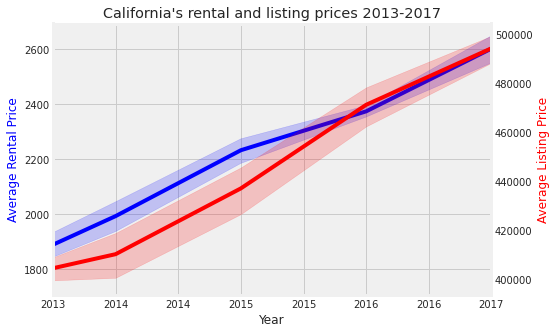

In [ ]:
california = state[state['RegionName']=='California']

fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax2.grid(b=False)

sns.lineplot(ax=ax1, x='Year', y='MedianRentalPrice_AllHomes', data=california, color='b')
sns.lineplot(ax=ax2, x='Year', y='MedianListingPrice_AllHomes', data=california, color='r')

ax1.set_xlim([2013.5,2017])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rental Price', color='b')
ax2.set_ylabel('Average Listing Price', color='r')

plt.title('California\'s rental and listing prices 2013-2017')
plt.show()

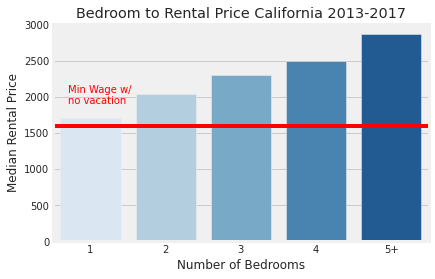

In [ ]:
california2013 = california[california['Year']>=2013]

bedrooms = ['MedianRentalPrice_{}Bedroom'.format(i) for i in range(1, 5)] + ['MedianRentalPrice_5BedroomOrMore']
medians = [np.median(california2013[california2013[b].notna()][b]) for b in bedrooms]

bedroom_x = ['1', '2', '3', '4', '5+']

bedroom2median = pd.DataFrame({
    'Number of Bedrooms':bedroom_x,
    'Median Rental Price':medians
})

plt.figure(figsize=(6,4))
graph = sns.barplot(x='Number of Bedrooms', y='Median Rental Price', data=bedroom2median, palette="Blues")

graph.axhline(10*8*5*4, color='r')
plt.text(-0.3, 1900, 'Min Wage w/ \nno vacation', fontsize = 10, color='r')

plt.title('Bedroom to Rental Price California 2013-2017')
plt.show()

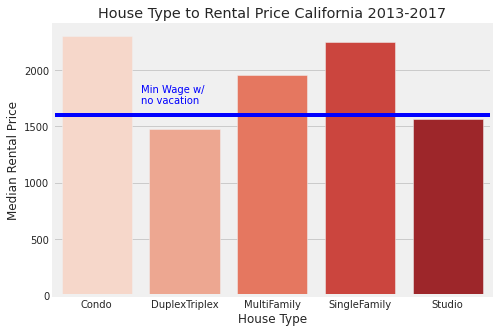

In [ ]:
types = ['CondoCoop', 'DuplexTriplex', 'MultiFamilyResidence5PlusUnits', 'SingleFamilyResidence', 'Studio']

types_ = ['MedianRentalPrice_' + t for t in types]
medians = [np.median(california2013[california2013[t].notna()][t]) for t in types_]

type2median = pd.DataFrame({
    'House Type':['Condo', 'DuplexTriplex', 'MultiFamily', 'SingleFamily', 'Studio'],
    'Median Rental Price':medians
})

plt.figure(figsize=(7,5))
graph = sns.barplot(x='House Type', y='Median Rental Price', data=type2median, palette="Reds")

graph.axhline(10*8*5*4, color='b')
plt.text(0.5, 1700, 'Min Wage w/ \nno vacation', fontsize = 10, color='b')

plt.title('House Type to Rental Price California 2013-2017')
plt.show()

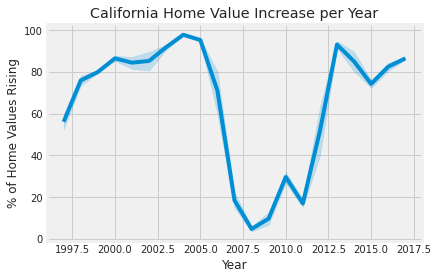

In [ ]:
sns.lineplot(x='Year', y='PctOfHomesIncreasingInValues_AllHomes', data=california)
plt.ylabel('% of Home Values Rising')
plt.title('California Home Value Increase per Year')
plt.show()

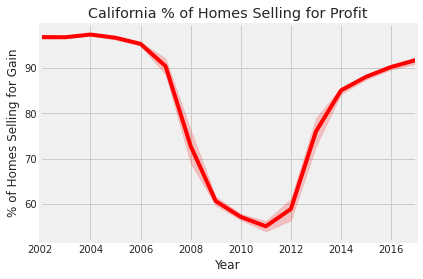

In [ ]:
sns.lineplot(x='Year', y='PctOfHomesSellingForGain_AllHomes', data=california, color='red')
plt.ylabel('% of Homes Selling for Gain')
plt.title('California % of Homes Selling for Profit')
plt.xlim([2002,2017])
plt.show()

In [ ]:
wages = pd.read_csv('drive/MyDrive/Zillow/WageData.csv',encoding='cp1252')
print(wages)

      Year          State  State.Minimum.Wage  \
0     1968        Alabama             0.00000   
1     1968         Alaska             2.10000   
2     1968        Arizona             0.46800   
3     1968       Arkansas             0.15625   
4     1968     California             1.65000   
...    ...            ...                 ...   
2857  2020       Virginia             7.25000   
2858  2020     Washington            13.50000   
2859  2020  West Virginia             8.75000   
2860  2020      Wisconsin             7.25000   
2861  2020        Wyoming             5.15000   

      State.Minimum.Wage.2020.Dollars  Federal.Minimum.Wage  \
0                                0.00                  1.15   
1                               15.61                  1.15   
2                                3.48                  1.15   
3                                1.16                  1.15   
4                               12.26                  1.15   
...                              

In [ ]:
wages2017 = wages[wages['Year']==2017][['State','Effective.Minimum.Wage']]
print(wages2017)

                     State  Effective.Minimum.Wage
2646               Alabama                    7.25
2647                Alaska                    9.80
2648               Arizona                   10.00
2649              Arkansas                    8.50
2650            California                   10.00
2651              Colorado                    9.30
2652           Connecticut                   10.10
2653              Delaware                    8.25
2654  District of Columbia                   11.50
2655               Florida                    8.10
2656               Georgia                    7.25
2657                  Guam                    8.25
2658                Hawaii                    9.25
2659                 Idaho                    7.25
2660              Illinois                    8.25
2661               Indiana                    7.25
2662                  Iowa                    7.25
2663                Kansas                    7.25
2664              Kentucky     

In [ ]:
def state_to_rental(s):
  prices2017 = state[state['Year']==2017][['MedianRentalPrice_1Bedroom','RegionName']]
  price_state = prices2017[prices2017['RegionName']==s]['MedianRentalPrice_1Bedroom']
  avg_price = np.median(np.array(price_state))
  return avg_price

states = np.unique(wages['State'])
states = [s.replace(' ', '') for s in states if s not in ['Guam','Nebraska','Puerto Rico','U.S. Virgin Islands','Vermont']]
rental_price = [state_to_rental(state) for state in states]

state2rental = {state: rental for state, rental in zip(states, rental_price)}
print(state2rental)

{'Alabama': 740.0, 'Alaska': 912.5, 'Arizona': 915.5, 'Arkansas': 666.0, 'California': 1942.5, 'Colorado': 1410.5, 'Connecticut': 1257.25, 'Delaware': 979.0, 'DistrictofColumbia': 2216.5, 'Florida': 1350.0, 'Georgia': 1205.5, 'Hawaii': 1700.0, 'Idaho': 625.0, 'Illinois': 1395.0, 'Indiana': 700.0, 'Iowa': 722.5, 'Kansas': 694.5, 'Kentucky': 745.5, 'Louisiana': 950.0, 'Maine': 1100.0, 'Maryland': 1387.25, 'Massachusetts': 1962.5, 'Michigan': 775.0, 'Minnesota': 1205.0, 'Mississippi': 695.0, 'Missouri': 750.0, 'Montana': 675.0, 'Nevada': 916.0, 'NewHampshire': 1012.5, 'NewJersey': 1552.5, 'NewMexico': 677.0, 'NewYork': 2154.5, 'NorthCarolina': 1032.0, 'NorthDakota': 625.0, 'Ohio': 717.5, 'Oklahoma': 650.0, 'Oregon': 1328.5, 'Pennsylvania': 1082.0, 'RhodeIsland': 1200.0, 'SouthCarolina': nan, 'SouthDakota': 650.0, 'Tennessee': 1207.0, 'Texas': 1095.0, 'Utah': 920.0, 'Virginia': 1475.0, 'Washington': 1672.5, 'WestVirginia': 577.5, 'Wisconsin': 850.0, 'Wyoming': 649.5}


In [ ]:
state2code = {'Alabama':'AL', 'Alaska':'AK', 'Arkansas':'AR', 'Arizona':'AZ', 'California':'CA', 'Colorado':'CO', 'Iowa':'IA', 'Kansas':'KS', 'Louisiana':'LA', 'Michigan':'MI',
              'Minnesota':'MN', 'Mississippi':'MS', 'Missouri':'MO', 'Montana':'MT', 'NewMexico':'NM', 'NorthDakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK',
              'Pennsylvania':'PA', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Virginia':'VA', 'West Virginia':'WV', 'Wyoming':'WY',
              'Connecticut':'CT', 'Delaware':'DE', 'DistrictofColumbia':'DC', 'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID',
              'Illinois':'IL', 'Indiana':'IN', 'Kentucky':'KY', 'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 
              'Minnesota':'MN', 'Nebraska':'NE', 'Nevada':'NV', 'NewHampshire':'NH', 'NewJersey':'NJ', 'NewYork':'NY', 
              'NorthCarolina':'NC', 'Oregon':'OR', 'PuertoRico':'PR', 'RhodeIsland':'RI', 'SouthCarolina':'SC', 'SouthDakota':'SD',
              'Vermont':'VT', 'VirginIslands':'VI', 'Washington':'WA', 'Wisconsin':'WI', 'WestVirginia':'WV'}

for key in list(state2rental.keys()):
  state2rental[state2code[key]] = state2rental.pop(key)

df = pd.DataFrame({
    'State':list(state2rental.keys()),
    'One Bedroom Rent':list(state2rental.values())
})
df = df.dropna()

print(df)

   State  One Bedroom Rent
0     AL            740.00
1     AK            912.50
2     AZ            915.50
3     AR            666.00
4     CA           1942.50
5     CO           1410.50
6     CT           1257.25
7     DE            979.00
8     DC           2216.50
9     FL           1350.00
10    GA           1205.50
11    HI           1700.00
12    ID            625.00
13    IL           1395.00
14    IN            700.00
15    IA            722.50
16    KS            694.50
17    KY            745.50
18    LA            950.00
19    ME           1100.00
20    MD           1387.25
21    MA           1962.50
22    MI            775.00
23    MN           1205.00
24    MS            695.00
25    MO            750.00
26    MT            675.00
27    NV            916.00
28    NH           1012.50
29    NJ           1552.50
30    NM            677.00
31    NY           2154.50
32    NC           1032.00
33    ND            625.00
34    OH            717.50
35    OK            650.00
3

In [ ]:
fig = px.choropleth(df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='One Bedroom Rent',
                    color_continuous_scale="sunset",
                    )

fig.update_layout(
      title_text = 'Median One Bedroom Rent by State 2017',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

In [ ]:
wages2017['One Bedroom Rent'] = wages2017['State'].apply(lambda s: state_to_rental(s))
wages2017 = wages2017.dropna() 

wages2017['Monthly Salary'] = wages2017['Effective.Minimum.Wage'].apply(lambda w: w*8*5*4)
wages2017['% of Salary to Rent'] = wages2017['One Bedroom Rent'] / wages2017['Monthly Salary'] * 100
wages2017['% of Salary to Rent'] = wages2017['% of Salary to Rent'].apply(lambda x: int(x))

wages2017['State Code'] = wages2017['State Code'] = wages2017['State'].apply(lambda s: state2code[s])

print(wages2017)

              State  Effective.Minimum.Wage  One Bedroom Rent  Monthly Salary  \
2646        Alabama                    7.25            740.00          1160.0   
2647         Alaska                    9.80            912.50          1568.0   
2648        Arizona                   10.00            915.50          1600.0   
2649       Arkansas                    8.50            666.00          1360.0   
2650     California                   10.00           1942.50          1600.0   
2651       Colorado                    9.30           1410.50          1488.0   
2652    Connecticut                   10.10           1257.25          1616.0   
2653       Delaware                    8.25            979.00          1320.0   
2655        Florida                    8.10           1350.00          1296.0   
2656        Georgia                    7.25           1205.50          1160.0   
2658         Hawaii                    9.25           1700.00          1480.0   
2659          Idaho         

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
fig = px.choropleth(wages2017,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='% of Salary to Rent',
                    color_continuous_scale="reds",
                    range_color=(30,130)
                    )

fig.update_layout(
      title_text = 'Percent of Min. Wage Salary that goes to One Bedroom Rent 2017',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

In [ ]:
def state_to_studio(s):
  prices2017 = state[state['Year']==2017][['MedianRentalPrice_Studio','RegionName']]
  price_state = prices2017[prices2017['RegionName']==s]['MedianRentalPrice_Studio']
  avg_price = np.median(np.array(price_state))

  return avg_price

studio_price = [state_to_studio(state) for state in states]
state2studio = {state: studio for state, studio in zip(states, studio_price)}

print(state2studio)

{'Alabama': 995.0, 'Alaska': nan, 'Arizona': 1350.0, 'Arkansas': 1037.5, 'California': 1872.5, 'Colorado': 1355.0, 'Connecticut': 1250.75, 'Delaware': 1026.25, 'DistrictofColumbia': 1812.5, 'Florida': 1625.0, 'Georgia': 1293.5, 'Hawaii': 1406.25, 'Idaho': nan, 'Illinois': 1439.5, 'Indiana': 1050.0, 'Iowa': 855.0, 'Kansas': nan, 'Kentucky': 995.0, 'Louisiana': 1330.0, 'Maine': nan, 'Maryland': 1685.0, 'Massachusetts': 1680.0, 'Michigan': 932.5, 'Minnesota': 1110.0, 'Mississippi': 1037.5, 'Missouri': 875.0, 'Montana': 627.0, 'Nevada': nan, 'NewHampshire': 892.5, 'NewJersey': 1800.0, 'NewMexico': 837.5, 'NewYork': 2467.75, 'NorthCarolina': 1350.0, 'NorthDakota': nan, 'Ohio': 730.0, 'Oklahoma': 1000.0, 'Oregon': 1339.0, 'Pennsylvania': 1170.0, 'RhodeIsland': 1126.25, 'SouthCarolina': 1307.5, 'SouthDakota': nan, 'Tennessee': 1300.0, 'Texas': 1397.5, 'Utah': nan, 'Virginia': 1643.75, 'Washington': 1389.5, 'WestVirginia': 743.75, 'Wisconsin': 885.0, 'Wyoming': 1100.0}


In [ ]:
for key in list(state2studio.keys()):
  state2studio[state2code[key]] = state2studio.pop(key)

df = pd.DataFrame({
    'State':list(state2studio.keys()),
    'Studio Rent':list(state2studio.values())
})
df = df.dropna()

print(df)

   State  Studio Rent
0     AL       995.00
2     AZ      1350.00
3     AR      1037.50
4     CA      1872.50
5     CO      1355.00
6     CT      1250.75
7     DE      1026.25
8     DC      1812.50
9     FL      1625.00
10    GA      1293.50
11    HI      1406.25
13    IL      1439.50
14    IN      1050.00
15    IA       855.00
17    KY       995.00
18    LA      1330.00
20    MD      1685.00
21    MA      1680.00
22    MI       932.50
23    MN      1110.00
24    MS      1037.50
25    MO       875.00
26    MT       627.00
28    NH       892.50
29    NJ      1800.00
30    NM       837.50
31    NY      2467.75
32    NC      1350.00
34    OH       730.00
35    OK      1000.00
36    OR      1339.00
37    PA      1170.00
38    RI      1126.25
39    SC      1307.50
41    TN      1300.00
42    TX      1397.50
44    VA      1643.75
45    WA      1389.50
46    WV       743.75
47    WI       885.00
48    WY      1100.00


In [ ]:
fig = px.choropleth(df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Studio Rent',
                    color_continuous_scale="sunsetdark",
                    )

fig.update_layout(
      title_text = 'Median Studio Rent by State 2017',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

In [ ]:
wages2017 = wages[wages['Year']==2017][['State','Effective.Minimum.Wage']]

wages2017['Studio Rent'] = wages2017['State'].apply(lambda s: state_to_studio(s))
wages2017 = wages2017.dropna() 

wages2017['Monthly Salary'] = wages2017['Effective.Minimum.Wage'].apply(lambda w: w*8*5*4)
wages2017['% of Salary to Rent'] = wages2017['Studio Rent'] / wages2017['Monthly Salary'] * 100
wages2017['% of Salary to Rent'] = wages2017['% of Salary to Rent'].apply(lambda x: int(x))

wages2017['State Code'] = wages2017['State Code'] = wages2017['State'].apply(lambda s: state2code[s])

print(wages2017)

              State  Effective.Minimum.Wage  Studio Rent  Monthly Salary  \
2646        Alabama                    7.25       995.00          1160.0   
2648        Arizona                   10.00      1350.00          1600.0   
2649       Arkansas                    8.50      1037.50          1360.0   
2650     California                   10.00      1872.50          1600.0   
2651       Colorado                    9.30      1355.00          1488.0   
2652    Connecticut                   10.10      1250.75          1616.0   
2653       Delaware                    8.25      1026.25          1320.0   
2655        Florida                    8.10      1625.00          1296.0   
2656        Georgia                    7.25      1293.50          1160.0   
2658         Hawaii                    9.25      1406.25          1480.0   
2660       Illinois                    8.25      1439.50          1320.0   
2661        Indiana                    7.25      1050.00          1160.0   
2662        

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.



In [ ]:
fig = px.choropleth(wages2017,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='% of Salary to Rent',
                    color_continuous_scale="deep",
                    range_color=(30,145)
                    )

fig.update_layout(
      title_text = 'Percent of Min. Wage Salary that goes to Studio Rent 2017',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
      )

fig.show()

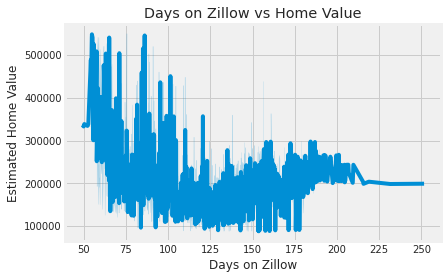

In [ ]:
sns.lineplot(x='DaysOnZillow_AllHomes', y='ZHVI_AllHomes', data=state)
plt.xlabel('Days on Zillow')
plt.ylabel('Estimated Home Value')
plt.title('Days on Zillow vs Home Value')
plt.show()

In [ ]:
types = ['CondoCoop', 'DuplexTriplex', 'MultiFamilyResidence5PlusUnits', 'SingleFamilyResidence', 'Studio']
types_ = ['MedianRentalPrice_' + t for t in types]
years = [i+2010 for i in range(8)]

total_types = []
total_years = []
all_prices = []

for t in types_:
  for y in years:
      total_types.append(t)
      total_years.append(y)

      prices = state[state['Year'] == y][t].dropna()
      price = np.median(prices)
      all_prices.append(price)

total_types = [t[18:] for t in total_types]

print(total_types)
print(total_years)
print(all_prices)

['CondoCoop', 'CondoCoop', 'CondoCoop', 'CondoCoop', 'CondoCoop', 'CondoCoop', 'CondoCoop', 'CondoCoop', 'DuplexTriplex', 'DuplexTriplex', 'DuplexTriplex', 'DuplexTriplex', 'DuplexTriplex', 'DuplexTriplex', 'DuplexTriplex', 'DuplexTriplex', 'MultiFamilyResidence5PlusUnits', 'MultiFamilyResidence5PlusUnits', 'MultiFamilyResidence5PlusUnits', 'MultiFamilyResidence5PlusUnits', 'MultiFamilyResidence5PlusUnits', 'MultiFamilyResidence5PlusUnits', 'MultiFamilyResidence5PlusUnits', 'MultiFamilyResidence5PlusUnits', 'SingleFamilyResidence', 'SingleFamilyResidence', 'SingleFamilyResidence', 'SingleFamilyResidence', 'SingleFamilyResidence', 'SingleFamilyResidence', 'SingleFamilyResidence', 'SingleFamilyResidence', 'Studio', 'Studio', 'Studio', 'Studio', 'Studio', 'Studio', 'Studio', 'Studio']
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2010, 2011, 20

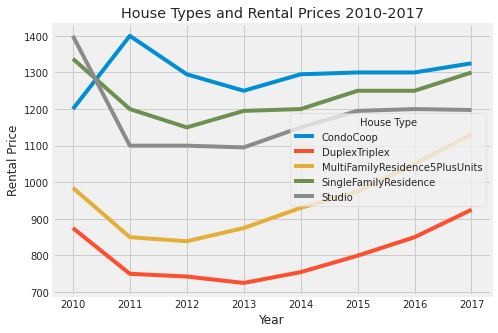

In [ ]:
df = pd.DataFrame({
    'Year':total_years,
    'House Type':total_types,
    'Rental Price':all_prices
})

plt.figure(figsize=(7,5))
sns.lineplot(x='Year', y='Rental Price', hue='House Type', data=df)
plt.title('House Types and Rental Prices 2010-2017')
plt.show()

In [ ]:
m2month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
def date_to_month(date):
  m = int(date[5:7])
  month = m2month[m]
  return month

state['Month'] = state['Date'].apply(lambda date: date_to_month(date))
print(state[['Date', 'Month']])

             Date Month
0      1996-04-30   Apr
1      1996-04-30   Apr
2      1996-04-30   Apr
3      1996-04-30   Apr
4      1996-04-30   Apr
...           ...   ...
13207  2017-12-31   Dec
13208  2017-12-31   Dec
13209  2017-12-31   Dec
13210  2017-12-31   Dec
13211  2017-12-31   Dec

[13212 rows x 2 columns]


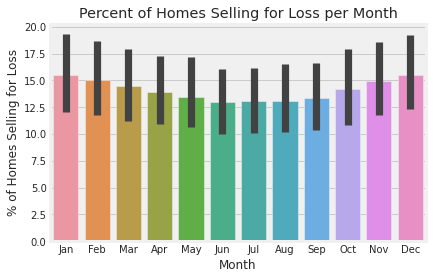

In [ ]:
sns.barplot(x='Month', y='PctOfHomesSellingForLoss_AllHomes', data=state, order=list(m2month.values()))
plt.ylabel('% of Homes Selling for Loss')
plt.title('Percent of Homes Selling for Loss per Month')
plt.show()

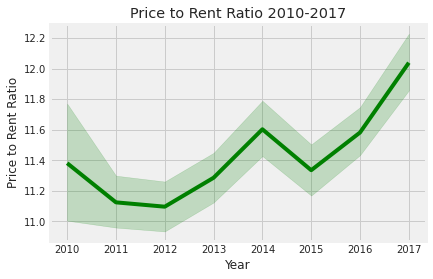

In [ ]:
sns.lineplot(x='Year', y='PriceToRentRatio_AllHomes', data=state, color='g')
plt.ylabel('Price to Rent Ratio')
plt.title('Price to Rent Ratio 2010-2017')
plt.show()